In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
import os
os.listdir('/content/drive/MyDrive/Dataset')

['daily_region_data_2020-06-01_to_2022-06-01.csv',
 'daily_fuel_type_data_2020-06-01_to_2022-06-01.csv',
 'region_data.pkl',
 'energy_weather_data_2020-06-01_to_2022-06-01_US_Center.csv',
 'Readme.gdoc',
 'df_fuel.csv',
 'DoAn.zip',
 '2025-07-16 20-13-25.mkv']

In [4]:
df_test=pd.read_csv('/content/drive/MyDrive/Dataset/energy_weather_data_2020-06-01_to_2022-06-01_US_Center.csv')

In [5]:
df_test.shape

(1058006, 84)

In [6]:
df_fuel_respondents = df_test[(df_test['timezone'] == "Central") & (df_test['type-name']=='Demand')]
df_fuel_respondents.shape

(49387, 84)

In [7]:
respondents=['AEC' ,'AECI' ,'AVA' , 'AZPS' ,'BANC', 'BPAT','CAL']

In [8]:
df_fuel_respondents = df_fuel_respondents[
    (df_fuel_respondents['timezone'] == "Central") &
    (df_fuel_respondents['respondent'].isin(respondents))
]
a=df_fuel_respondents

In [9]:
keep_columns = [
    # Cột mục tiêu
    'date',
    'respondent',
    'value',

    # Chu kỳ thời gian
    'day_of_week_sin', 'day_of_week_cos',
    'month_sin', 'month_cos',
    'day_of_year_sin', 'day_of_year_cos',

    # Phân loại thời gian
    'is_weekend', 'is_business_day',

    # Lịch sử điện năng
    'demand_lag_1d', 'demand_lag_7d', 'demand_lag_30d', 'demand_lag_365d',
    'demand_ma_7d', 'demand_ma_30d', 'demand_ma_90d',
    'demand_trend_7d', 'demand_trend_30d',
    'demand_growth_rate_7d', 'demand_growth_rate_30d',
    'demand_yoy_change', 'demand_yoy_growth',
    'demand_std_30d', 'demand_max_30d', 'demand_min_30d', 'demand_volatility_30d',

    # Thời tiết hiện tại
    'tavg', 'tmin', 'tmax', 'temp_range',
    'cdd', 'hdd', 'discomfort_index', 'weather_severity_index',
    'temp_extreme_cold', 'temp_extreme_hot',
    'wind_high', 'rain_day', 'heavy_rain',
    'pressure_low', 'pressure_high',

    # Thời tiết trễ và trung bình trượt
    'tavg_lag1', 'tmax_lag1', 'tmin_lag1', 'prcp_lag1', 'wspd_lag1',
    'tavg_lag3', 'tmax_lag3', 'tmin_lag3', 'prcp_lag3', 'wspd_lag3',
    'tavg_ma7', 'tmax_ma7', 'tmin_ma7', 'prcp_ma7', 'wspd_ma7'
]
a = df_fuel_respondents[keep_columns].copy()

In [10]:
df_fuel_respondents.shape

(4843, 84)

In [11]:
a.fillna(method='ffill', inplace=True)
print(a.shape)
a.dropna(inplace=True)
print(a.shape)

(4843, 58)
(4770, 58)


/tmp/ipython-input-11-258310720.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  a.fillna(method='ffill', inplace=True)


In [12]:
a.to_csv("all_respondents_filtered.csv", index=False)

In [13]:
keep_columns = [
    # Cột mục tiêu
    'date',
    'respondent',
    'value',

    # Chu kỳ thời gian
    'day_of_week_sin', 'day_of_week_cos',
    'month_sin', 'month_cos',
    'day_of_year_sin', 'day_of_year_cos',

    # Phân loại thời gian
    'is_weekend', 'is_business_day',

    # Lịch sử điện năng
    'demand_lag_1d', 'demand_lag_7d', 'demand_lag_30d', 'demand_lag_365d',
    'demand_ma_7d', 'demand_ma_30d', 'demand_ma_90d',
    'demand_trend_7d', 'demand_trend_30d',
    'demand_growth_rate_7d', 'demand_growth_rate_30d',
    'demand_yoy_change', 'demand_yoy_growth',
    'demand_std_30d', 'demand_max_30d', 'demand_min_30d', 'demand_volatility_30d',

    # Thời tiết hiện tại
    'tavg', 'tmin', 'tmax', 'temp_range',
    'cdd', 'hdd', 'discomfort_index', 'weather_severity_index',
    'temp_extreme_cold', 'temp_extreme_hot',
    'wind_high', 'rain_day', 'heavy_rain',
    'pressure_low', 'pressure_high',

    # Thời tiết trễ và trung bình trượt
    'tavg_lag1', 'tmax_lag1', 'tmin_lag1', 'prcp_lag1', 'wspd_lag1',
    'tavg_lag3', 'tmax_lag3', 'tmin_lag3', 'prcp_lag3', 'wspd_lag3',
    'tavg_ma7', 'tmax_ma7', 'tmin_ma7', 'prcp_ma7', 'wspd_ma7'
]
df_fuel_respondents = df_fuel_respondents[keep_columns].copy()

# Kiểm tra kết quả
print(df_fuel_respondents.head())
print(df_fuel_respondents.shape)

          date respondent  value  day_of_week_sin  day_of_week_cos  \
1   2020-06-01        AEC  14023         0.000000         1.000000   
6   2020-06-02        AEC  13171         0.781831         0.623490   
11  2020-06-03        AEC  12882         0.974928        -0.222521   
16  2020-06-04        AEC  13753         0.433884        -0.900969   
21  2020-06-05        AEC  14486        -0.433884        -0.900969   

       month_sin  month_cos  day_of_year_sin  day_of_year_cos  is_weekend  \
1   1.224647e-16       -1.0         0.487847        -0.872929           0   
6   1.224647e-16       -1.0         0.472759        -0.881192           0   
11  1.224647e-16       -1.0         0.457531        -0.889193           0   
16  1.224647e-16       -1.0         0.442168        -0.896932           0   
21  1.224647e-16       -1.0         0.426674        -0.904405           0   

    ...  tavg_lag3  tmax_lag3  tmin_lag3  prcp_lag3  wspd_lag3   tavg_ma7  \
1   ...        NaN        NaN        Na

In [14]:
df_fuel_respondents.fillna(method='ffill', inplace=True)
df_fuel_respondents.dropna(inplace=True)

/tmp/ipython-input-14-1907629900.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_fuel_respondents.fillna(method='ffill', inplace=True)


In [15]:
df_fuel_respondents

,date,respondent,value,day_of_week_sin,day_of_week_cos,month_sin,month_cos,day_of_year_sin,day_of_year_cos,is_weekend,...,tavg_lag3,tmax_lag3,tmin_lag3,prcp_lag3,wspd_lag3,tavg_ma7,tmax_ma7,tmin_ma7,prcp_ma7,wspd_ma7
366,2020-08-13,AEC,15878,0.433884,-0.900969,-8.660254e-01,-0.500000,-0.678820,-0.734304,0,...,28.4,33.3,24.0,0.0,12.6,26.485714,30.471429,23.514286,4.085714,9.985714
371,2020-08-14,AEC,15049,-0.433884,-0.900969,-8.660254e-01,-0.500000,-0.691351,-0.722519,0,...,28.0,31.7,25.0,1.0,9.4,26.928571,31.114286,23.914286,1.914286,10.328571
376,2020-08-15,AEC,15245,-0.974928,-0.222521,-8.660254e-01,-0.500000,-0.703677,-0.710520,1,...,27.8,33.3,25.6,0.0,9.4,27.028571,31.028571,23.985714,1.914286,11.671429
381,2020-08-16,AEC,16275,-0.781831,0.623490,-8.660254e-01,-0.500000,-0.715795,-0.698310,1,...,25.5,26.1,23.3,12.4,8.6,26.314286,29.842857,23.671429,2.428571,12.914286
386,2020-08-17,AEC,16461,0.000000,1.000000,-8.660254e-01,-0.500000,-0.727701,-0.685894,0,...,27.3,31.7,23.9,0.0,13.8,25.557143,29.214286,23.100000,2.471429,12.328571
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92973,2022-05-28,CAL,658565,-0.974928,-0.222521,5.000000e-01,-0.866025,0.561034,-0.827793,1,...,16.4,21.1,13.9,0.5,11.2,19.871429,24.042857,16.942857,2.642857,9.528571
92978,2022-05-29,CAL,614832,-0.781831,0.623490,5.000000e-01,-0.866025,0.546711,-0.837321,1,...,17.1,20.6,13.9,0.0,10.9,19.100000,23.328571,16.071429,2.642857,9.342857
92983,2022-05-30,CAL,638756,0.000000,1.000000,5.000000e-01,-0.866025,0.532227,-0.846602,0,...,20.5,26.1,17.8,11.7,6.6,19.514286,24.128571,16.142857,2.614286,8.771429
92988,2022-05-31,CAL,711848,0.781831,0.623490,5.000000e-01,-0.866025,0.517586,-0.855631,0,...,20.6,24.4,18.0,6.1,7.8,21.042857,26.028571,16.942857,2.614286,8.128571


In [16]:
df_fuel_respondents.to_csv("all_respondents_filtered.csv", index=False)

In [17]:
df_fuel_respondents

,date,respondent,value,day_of_week_sin,day_of_week_cos,month_sin,month_cos,day_of_year_sin,day_of_year_cos,is_weekend,...,tavg_lag3,tmax_lag3,tmin_lag3,prcp_lag3,wspd_lag3,tavg_ma7,tmax_ma7,tmin_ma7,prcp_ma7,wspd_ma7
366,2020-08-13,AEC,15878,0.433884,-0.900969,-8.660254e-01,-0.500000,-0.678820,-0.734304,0,...,28.4,33.3,24.0,0.0,12.6,26.485714,30.471429,23.514286,4.085714,9.985714
371,2020-08-14,AEC,15049,-0.433884,-0.900969,-8.660254e-01,-0.500000,-0.691351,-0.722519,0,...,28.0,31.7,25.0,1.0,9.4,26.928571,31.114286,23.914286,1.914286,10.328571
376,2020-08-15,AEC,15245,-0.974928,-0.222521,-8.660254e-01,-0.500000,-0.703677,-0.710520,1,...,27.8,33.3,25.6,0.0,9.4,27.028571,31.028571,23.985714,1.914286,11.671429
381,2020-08-16,AEC,16275,-0.781831,0.623490,-8.660254e-01,-0.500000,-0.715795,-0.698310,1,...,25.5,26.1,23.3,12.4,8.6,26.314286,29.842857,23.671429,2.428571,12.914286
386,2020-08-17,AEC,16461,0.000000,1.000000,-8.660254e-01,-0.500000,-0.727701,-0.685894,0,...,27.3,31.7,23.9,0.0,13.8,25.557143,29.214286,23.100000,2.471429,12.328571
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92973,2022-05-28,CAL,658565,-0.974928,-0.222521,5.000000e-01,-0.866025,0.561034,-0.827793,1,...,16.4,21.1,13.9,0.5,11.2,19.871429,24.042857,16.942857,2.642857,9.528571
92978,2022-05-29,CAL,614832,-0.781831,0.623490,5.000000e-01,-0.866025,0.546711,-0.837321,1,...,17.1,20.6,13.9,0.0,10.9,19.100000,23.328571,16.071429,2.642857,9.342857
92983,2022-05-30,CAL,638756,0.000000,1.000000,5.000000e-01,-0.866025,0.532227,-0.846602,0,...,20.5,26.1,17.8,11.7,6.6,19.514286,24.128571,16.142857,2.614286,8.771429
92988,2022-05-31,CAL,711848,0.781831,0.623490,5.000000e-01,-0.866025,0.517586,-0.855631,0,...,20.6,24.4,18.0,6.1,7.8,21.042857,26.028571,16.942857,2.614286,8.128571


In [18]:
keep_columns = [
    # Cột mục tiêu
    'value',

    # Chu kỳ thời gian
    'day_of_week_sin', 'day_of_week_cos',
    'month_sin', 'month_cos',
    'day_of_year_sin', 'day_of_year_cos',

    # Phân loại thời gian
    'is_weekend', 'is_business_day',

    # Lịch sử điện năng
    'demand_lag_1d', 'demand_lag_7d', 'demand_lag_30d', 'demand_lag_365d',
    'demand_ma_7d', 'demand_ma_30d', 'demand_ma_90d',
    'demand_trend_7d', 'demand_trend_30d',
    'demand_growth_rate_7d', 'demand_growth_rate_30d',
    'demand_yoy_change', 'demand_yoy_growth',
    'demand_std_30d', 'demand_max_30d', 'demand_min_30d', 'demand_volatility_30d',

    # Thời tiết hiện tại
    'tavg', 'tmin', 'tmax', 'temp_range',
    'cdd', 'hdd', 'discomfort_index', 'weather_severity_index',
    'temp_extreme_cold', 'temp_extreme_hot',
    'wind_high', 'rain_day', 'heavy_rain',
    'pressure_low', 'pressure_high',

    # Thời tiết trễ và trung bình trượt
    'tavg_lag1', 'tmax_lag1', 'tmin_lag1', 'prcp_lag1', 'wspd_lag1',
    'tavg_lag3', 'tmax_lag3', 'tmin_lag3', 'prcp_lag3', 'wspd_lag3',
    'tavg_ma7', 'tmax_ma7', 'tmin_ma7', 'prcp_ma7', 'wspd_ma7'
]
# df_final = df_new[keep_columns].copy()

# # Kiểm tra kết quả
# print(df_final.head())
# print(df_final.shape)

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = df_final.corr(numeric_only=True)

# plt.figure(figsize=(12,10))
# sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
# plt.title("Correlation Heatmap giữa các feature và value")
# plt.show()


In [ ]:
# Lấy tương quan với 'value' và lấy giá trị tuyệt đối
corr_matrix = df_final.corr(numeric_only=True)
corr_with_target = corr_matrix['value'].abs().sort_values(ascending=False)
print(corr_with_target)
selected_features = corr_with_target[corr_with_target > 0.2].index.tolist()
  # Loại bỏ cột mục tiêu

print("Các feature giữ lại:", selected_features)
print(len(selected_features))

In [ ]:
df_final= df_final[selected_features].copy()

In [ ]:
from sklearn.preprocessing import MinMaxScaler
df_final= df_final[selected_features].copy()
# Loại cột period
feature_cols = df_final.columns

# Khởi tạo scaler
scaler = MinMaxScaler()

# Fit & transform toàn bộ feature
df_final[feature_cols] = scaler.fit_transform(df_final[feature_cols])
import joblib
joblib.dump(scaler, 'scaler.save')

In [ ]:
scaler

In [ ]:
feature_cols

In [ ]:
df_final

In [ ]:
import numpy as np

sequence_length = 10
features = feature_cols  # Chỉ lấy feature, không lấy cột mục tiêu

X, y = [], []

for i in range(len(df_final) - sequence_length):
    X.append(df_final[features].iloc[i:i+sequence_length].values)
    y.append(df_final['value'].iloc[i+sequence_length])  # Giá trị dự báo tại bước tiếp theo

X = np.array(X)
y = np.array(y)

print("Shape X:", X.shape)  # (số mẫu, sequence_length, số feature)
print("Shape y:", y.shape)  # (số mẫu,)

In [ ]:
train_size = int(0.8 * len(X))

X_train = X[:train_size]
y_train = y[:train_size]
X_test = X[train_size:]
y_test = y[train_size:]

print(X_train.shape, X_test.shape)

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

model = Sequential([
    LSTM(64, activation='tanh', return_sequences=False, input_shape=(sequence_length, X.shape[2])),
    Dropout(0.2),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse')
model.summary()

In [ ]:
history = model.fit(
    X_train, y_train,
    epochs=10,
    batch_size=32,
    validation_split=0.1,
    shuffle=False  # Time series không nên shuffle
)

In [ ]:
import matplotlib.pyplot as plt

y_pred = model.predict(X_test).flatten()

# Nếu đã scale value, cần inverse transform tại đây nếu muốn giá trị thật

plt.figure(figsize=(12,6))
plt.plot(y_test, label='Thực tế')
plt.plot(y_pred, label='Dự báo')
plt.title("So sánh giá trị thực và dự báo")
plt.legend()
plt.show()

In [ ]:
dummy = np.zeros((len(y_pred), len(df_final.columns)))
test_data = np.zeros((len(X_test), len(df_final.columns)))
# Gán y_pred vào cột đầu tiên (vị trí value)
dummy[:, 0] = y_pred
test_data[:, 0] = y_test
# Inverse transform toàn bộ
inverse = scaler.inverse_transform(dummy)
test = scaler.inverse_transform(test_data)
# Lấy lại giá trị thực tế của cột value
y_pred_real = inverse[:, 0]
y_test_real = test[:, 0]
print(y_pred_real[:5])
  # Kiểm tra vài giá trị đầu

In [ ]:
y_test_real

In [23]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# mae = mean_absolute_error(y_test_real, y_pred_real)
# rmse = np.sqrt(mean_squared_error(y_test_real, y_pred_real))

# print(f"MAE: {mae:.4f}")
# print(f"RMSE: {rmse:.4f}")

In [24]:
from sklearn.preprocessing import MinMaxScaler
import joblib
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.metrics import mean_absolute_error, mean_squared_error
all_results = {}
keep_columns = [
    # Cột mục tiêu
    'value',

    # Chu kỳ thời gian
    'day_of_week_sin', 'day_of_week_cos',
    'month_sin', 'month_cos',
    'day_of_year_sin', 'day_of_year_cos',

    # Phân loại thời gian
    'is_weekend', 'is_business_day',

    # Lịch sử điện năng
    'demand_lag_1d', 'demand_lag_7d', 'demand_lag_30d', 'demand_lag_365d',
    'demand_ma_7d', 'demand_ma_30d', 'demand_ma_90d',
    'demand_trend_7d', 'demand_trend_30d',
    'demand_growth_rate_7d', 'demand_growth_rate_30d',
    'demand_yoy_change', 'demand_yoy_growth',
    'demand_std_30d', 'demand_max_30d', 'demand_min_30d', 'demand_volatility_30d',

    # Thời tiết hiện tại
    'tavg', 'tmin', 'tmax', 'temp_range',
    'cdd', 'hdd', 'discomfort_index', 'weather_severity_index',
    'temp_extreme_cold', 'temp_extreme_hot',
    'wind_high', 'rain_day', 'heavy_rain',
    'pressure_low', 'pressure_high',

    # Thời tiết trễ và trung bình trượt
    'tavg_lag1', 'tmax_lag1', 'tmin_lag1', 'prcp_lag1', 'wspd_lag1',
    'tavg_lag3', 'tmax_lag3', 'tmin_lag3', 'prcp_lag3', 'wspd_lag3',
    'tavg_ma7', 'tmax_ma7', 'tmin_ma7', 'prcp_ma7', 'wspd_ma7'
]

# DataFrame lưu tổng hợp thống kê cho tất cả respondent
epoch_records = []

for respondent in respondents:
    print(f"training data at {respondent}")
    df_respondents = df_test[(df_test['timezone'] == "Central") & (df_test['type-name'] == 'Demand') & (df_test['respondent'] == respondent)]
    df_new = df_respondents.copy()
    df_new = df_new[keep_columns].copy()
    df_new.ffill(inplace=True)
    df_new.dropna(inplace=True)

    corr_matrix = df_new.corr(numeric_only=True)
    corr_with_target = corr_matrix['value'].abs().sort_values(ascending=False)
    selected_features = corr_with_target[corr_with_target > 0.2].index.tolist()

    df_new = df_new[selected_features].copy()
    feature_cols = df_new.columns

    scaler = MinMaxScaler()
    df_new[feature_cols] = scaler.fit_transform(df_new[feature_cols])

    sequence_length = 10
    features = feature_cols.drop('value')
    X, y = [], []

    for i in range(len(df_new) - sequence_length):
        X.append(df_new[features].iloc[i:i+sequence_length].values)
        y.append(df_new['value'].iloc[i+sequence_length])

    X = np.array(X)
    y = np.array(y)
    train_size = int(0.8 * len(X))
    X_train, y_train = X[:train_size], y[:train_size]
    X_test, y_test = X[train_size:], y[train_size:]

    model = Sequential([
        LSTM(128, activation='tanh', return_sequences=True, input_shape=(sequence_length, X.shape[2])),
        Dropout(0.2),

        LSTM(64, activation='tanh', return_sequences=False),
        Dropout(0.2),

        Dense(32, activation='relu'),
        Dropout(0.1),

        Dense(1)
    ])

    model.compile(optimizer='adam', loss='mse')
    history = model.fit(
        X_train, y_train,
        epochs=10,
        batch_size=32,
        validation_split=0.1,
        shuffle=False
    )
    y_pred = model.predict(X_test).flatten()
    print(y_test.shape)
    dates = pd.date_range(start='2022-07-01', periods=30, freq='D')
    # Tính các chỉ số đánh giá
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    dates = pd.date_range(start='2022-07-01', periods=30, freq='D')
    y_test_sample = y_test[:30]
    y_pred_sample = y_pred[:30]

    # Vẽ biểu đồ

    print(f"[{respondent}] MSE: {mse:.4f} | MAE: {mae:.4f} | RMSE: {rmse:.4f} ")
    data_bundle = {
        "model": model,
        "scaler": scaler,
        "features": selected_features
    }
    all_results[respondent] = data_bundle

    # Thống kê theo từng epoch
    for epoch_idx, (loss, val_loss) in enumerate(zip(history.history['loss'], history.history['val_loss']), 1):
        epoch_records.append({
            "respondent": respondent,
            "epoch": epoch_idx,
            "loss": loss,
            "val_loss": val_loss
        })

# Lưu file thống kê theo epochs
df_epoch_stats = pd.DataFrame(epoch_records)
df_epoch_stats.to_csv("training_epoch_statistics.csv", index=False)
print(df_epoch_stats.head())

training data at AEC


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 5s 91ms/step - loss: 0.1034 - val_loss: 0.0060
Epoch 2/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0588 - val_loss: 0.0535
Epoch 3/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0517 - val_loss: 0.0156
Epoch 4/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0361 - val_loss: 0.0349
Epoch 5/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0382 - val_loss: 0.0472
Epoch 6/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0331 - val_loss: 0.0301
Epoch 7/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0337 - val_loss: 0.0276
Epoch 8/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0297 - val_loss: 0.0348
Epoch 9/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0324 - val_loss: 0.0361
Epoch 10/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - loss: 0.0272 - val_loss: 0.0172


1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 462ms/step

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 250ms/step
(75,)
[AEC] MSE: 0.0126 | MAE: 0.0889 | RMSE: 0.1122 
training data at AECI


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 6s 65ms/step - loss: 0.0622 - val_loss: 0.0320
Epoch 2/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0170 - val_loss: 0.0273
Epoch 3/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0173 - val_loss: 0.0229
Epoch 4/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0117 - val_loss: 0.0190
Epoch 5/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0123 - val_loss: 0.0195
Epoch 6/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0113 - val_loss: 0.0254
Epoch 7/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0105 - val_loss: 0.0245
Epoch 8/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0116 - val_loss: 0.0257
Epoch 9/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0111 - val_loss: 0.0186
Epoch 10/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - loss: 0.0093 - val_loss: 0.0225
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 154ms/step
(130,)
[AECI] MSE: 0.0165 | MAE: 0.1026 | RMSE: 0.1283 
training data at AVA
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


15/15 ━━━━━━━━━━━━━━━━━━━━ 5s 62ms/step - loss: 0.0627 - val_loss: 0.3055
Epoch 2/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0484 - val_loss: 0.1174
Epoch 3/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0422 - val_loss: 0.0211
Epoch 4/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0307 - val_loss: 0.0286
Epoch 5/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0198 - val_loss: 0.0565
Epoch 6/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0211 - val_loss: 0.0292
Epoch 7/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0205 - val_loss: 0.0289
Epoch 8/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0186 - val_loss: 0.0429
Epoch 9/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - loss: 0.0174 - val_loss: 0.0324
Epoch 10/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - loss: 0.0189 - val_loss: 0.0187
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 143ms/step
(130,)
[AVA] MSE: 0.0138 | MAE: 0.0931 | RMSE: 0.1174 
training data at AZPS
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


15/15 ━━━━━━━━━━━━━━━━━━━━ 5s 65ms/step - loss: 0.1354 - val_loss: 0.0095
Epoch 2/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0296 - val_loss: 0.0050
Epoch 3/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0158 - val_loss: 0.0158
Epoch 4/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0225 - val_loss: 0.0014
Epoch 5/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0226 - val_loss: 0.0021
Epoch 6/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0291 - val_loss: 0.0069
Epoch 7/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0223 - val_loss: 0.0089
Epoch 8/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0360 - val_loss: 0.0054
Epoch 9/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - loss: 0.0229 - val_loss: 0.0146
Epoch 10/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - loss: 0.0166 - val_loss: 0.0073
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 152ms/step
(130,)
[AZPS] MSE: 0.0047 | MAE: 0.0540 | RMSE: 0.0684 
training data at BANC
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


15/15 ━━━━━━━━━━━━━━━━━━━━ 5s 65ms/step - loss: 0.0713 - val_loss: 0.0088
Epoch 2/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0188 - val_loss: 0.0083
Epoch 3/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0136 - val_loss: 0.0271
Epoch 4/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0191 - val_loss: 0.0037
Epoch 5/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0244 - val_loss: 0.0026
Epoch 6/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0182 - val_loss: 0.0206
Epoch 7/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0149 - val_loss: 0.0095
Epoch 8/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0122 - val_loss: 0.0030
Epoch 9/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 0.0115 - val_loss: 0.0057
Epoch 10/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 0.0127 - val_loss: 0.0107
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 124ms/step
(130,)
[BANC] MSE: 0.0061 | MAE: 0.0563 | RMSE: 0.0782 
training data at BPAT


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 5s 64ms/step - loss: 0.0264 - val_loss: 0.2452
Epoch 2/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0374 - val_loss: 0.0690
Epoch 3/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0346 - val_loss: 0.0310
Epoch 4/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0203 - val_loss: 0.0945
Epoch 5/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0255 - val_loss: 0.0174
Epoch 6/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0192 - val_loss: 0.0716
Epoch 7/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - loss: 0.0229 - val_loss: 0.0251
Epoch 8/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - loss: 0.0146 - val_loss: 0.0595
Epoch 9/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 0.0129 - val_loss: 0.0329
Epoch 10/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0145 - val_loss: 0.0418
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 94ms/step
(130,)
[BPAT] MSE: 0.0153 | MAE: 0.0887 | RMSE: 0.1238 
training data at CAL
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


15/15 ━━━━━━━━━━━━━━━━━━━━ 5s 60ms/step - loss: 0.0567 - val_loss: 0.0069
Epoch 2/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0410 - val_loss: 0.0171
Epoch 3/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0290 - val_loss: 0.0391
Epoch 4/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0414 - val_loss: 0.0044
Epoch 5/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0172 - val_loss: 0.0199
Epoch 6/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - loss: 0.0211 - val_loss: 0.0215
Epoch 7/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - loss: 0.0159 - val_loss: 0.0051
Epoch 8/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 0.0163 - val_loss: 0.0160
Epoch 9/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0156 - val_loss: 0.0085
Epoch 10/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0170 - val_loss: 0.0096
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 89ms/step
(130,)
[CAL] MSE: 0.0069 | MAE: 0.0662 | RMSE: 0.0829 
  respondent  epoch      loss  val_loss
0        AEC      1  0.0833

In [ ]:
df_epoch_stats

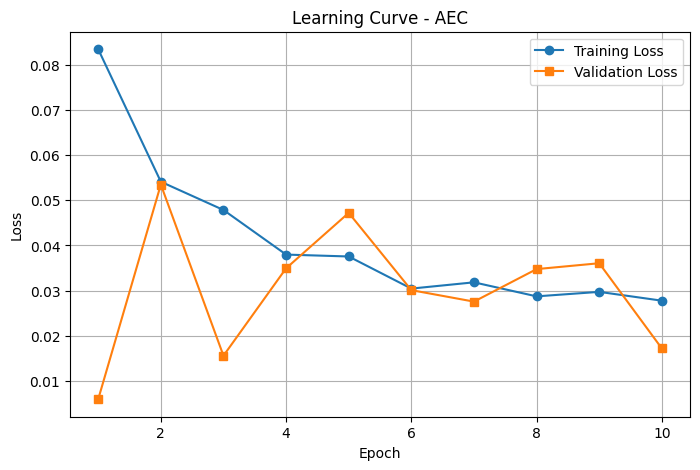

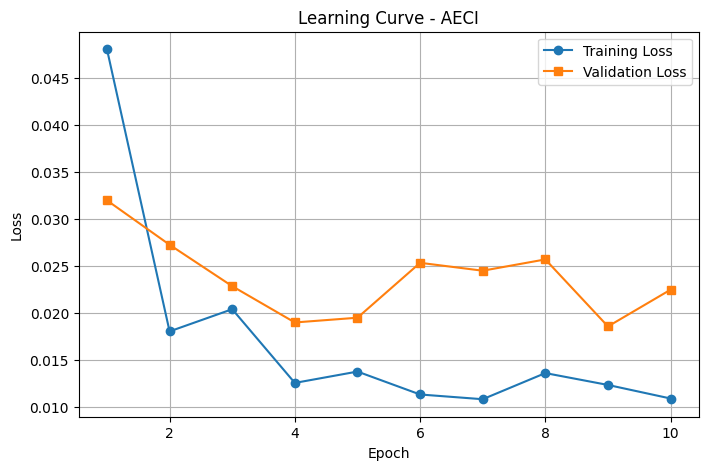

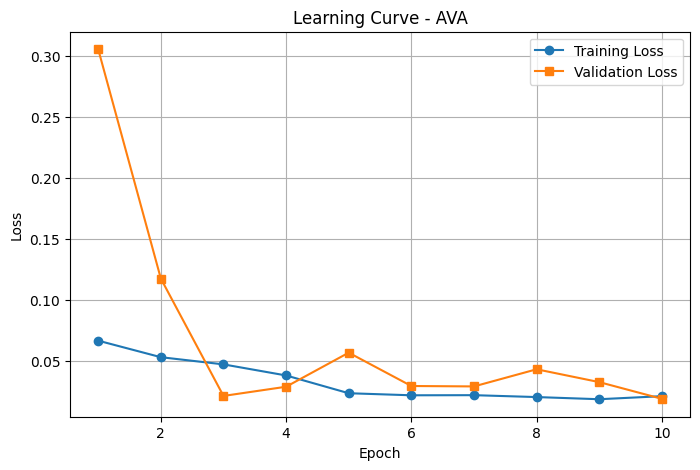

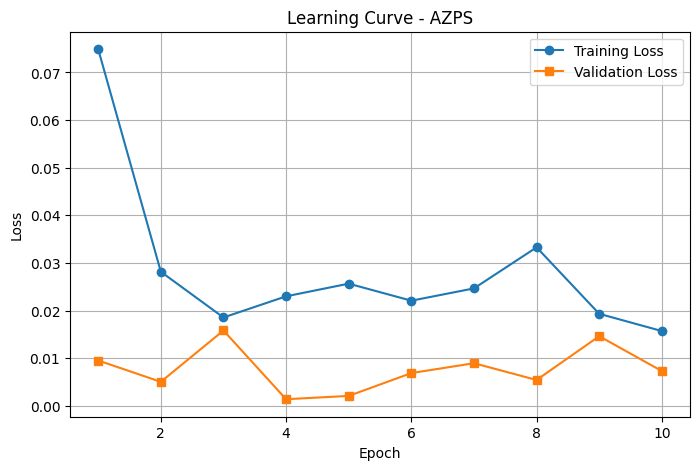

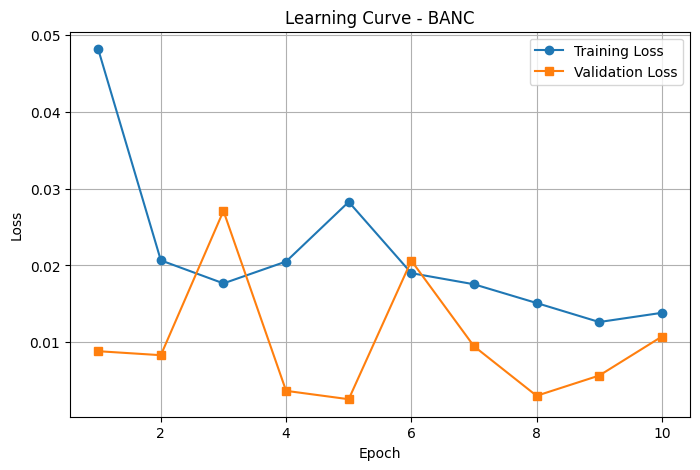

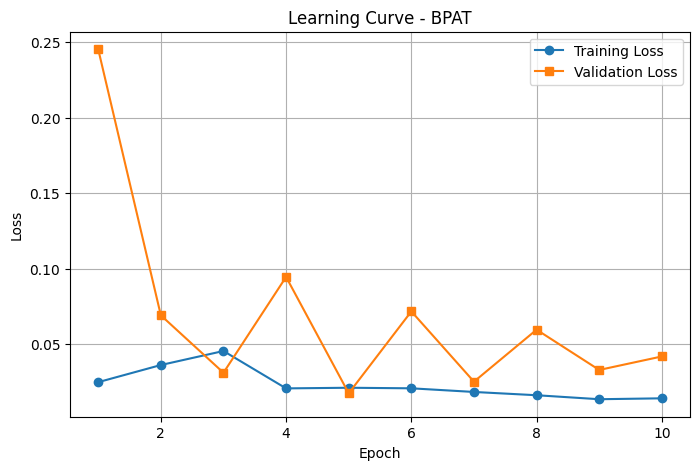

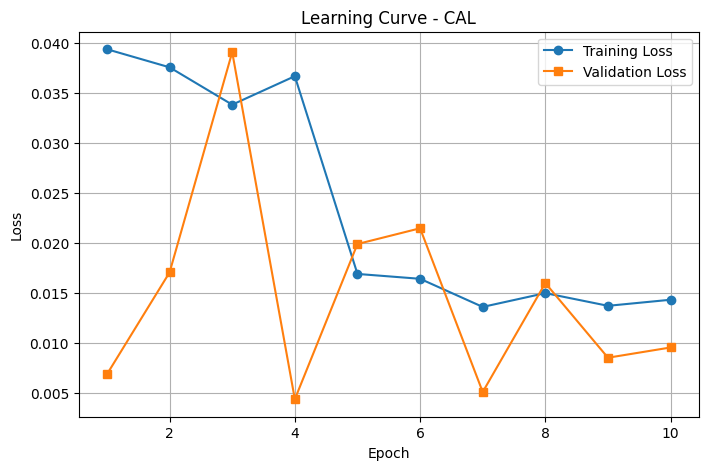

In [25]:
import pandas as pd
import matplotlib.pyplot as plt

# Đọc file thống kê đã lưu
df_epoch_stats = pd.read_csv("training_epoch_statistics.csv")

# Lấy danh sách respondent
respondents = df_epoch_stats['respondent'].unique()

# Vẽ biểu đồ cho từng respondent
for respondent in respondents:
    df_temp = df_epoch_stats[df_epoch_stats['respondent'] == respondent]

    plt.figure(figsize=(8, 5))
    plt.plot(df_temp['epoch'], df_temp['loss'], label='Training Loss', marker='o')
    plt.plot(df_temp['epoch'], df_temp['val_loss'], label='Validation Loss', marker='s')

    plt.title(f'Learning Curve - {respondent}')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)
    plt.show()


In [26]:
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score,mean_squared_error,mean_absolute_error

ml_results = {}

for respondent in respondents:
    print(f"Training ML models for {respondent} - scale luôn cả value")

    df_respondents = df_test[
        (df_test['timezone'] == "Central") &
        (df_test['type-name'] == 'Demand') &
        (df_test['respondent'] == respondent)
    ]
    df_new = df_respondents.copy()
    df_new = df_new[keep_columns].copy()
    df_new.fillna(method='ffill', inplace=True)
    df_new.dropna(inplace=True)
    print(df_new.shape)
    # Tự chọn feature riêng dựa trên tương quan với 'value'
    corr_matrix = df_new.corr(numeric_only=True)
    corr_with_target = corr_matrix['value'].abs().sort_values(ascending=False)
    selected_features = corr_with_target[corr_with_target > 0.2].index.tolist()

    df_new = df_new[selected_features].copy()

    # Tự tạo scaler mới
    scaler = MinMaxScaler()
    df_new[df_new.columns] = scaler.fit_transform(df_new[df_new.columns])  # scale toàn bộ, bao gồm cả 'value'

    feature_cols = df_new.drop(columns='value').columns

    X = df_new[feature_cols].values
    y = df_new['value'].values

    train_size = int(0.8 * len(X))
    X_train, y_train = X[:train_size], y[:train_size]
    X_test, y_test = X[train_size:], y[train_size:]

    models = {
        "RandomForest": RandomForestRegressor(n_estimators=100, random_state=42),
        "XGBoost": XGBRegressor(n_estimators=100, random_state=42)
    }

    result_per_respondent = {}

    for model_name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        mse = mean_squared_error(y_test, y_pred)
        mae = mean_absolute_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        rmse = np.sqrt(mse)
        print(f"{model_name} - MAE: {mae:.4f} - R2: {r2:.4f} - MSE: {mse:.4f}")

        result_per_respondent[model_name] = {
            "mse": mse,
            "r2": r2,
            "mae": mae,
            "model": model,
            "scaler": scaler,
            "features": selected_features
        }
    ml_results[respondent] = result_per_respondent


Training ML models for AEC - scale luôn cả value


/tmp/ipython-input-26-2129381180.py:17: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_new.fillna(method='ffill', inplace=True)


(384, 56)
RandomForest - MAE: 0.0074 - R2: 0.9869 - MSE: 0.0001
XGBoost - MAE: 0.0105 - R2: 0.9768 - MSE: 0.0003
Training ML models for AECI - scale luôn cả value
(658, 56)


/tmp/ipython-input-26-2129381180.py:17: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_new.fillna(method='ffill', inplace=True)


RandomForest - MAE: 0.0080 - R2: 0.9863 - MSE: 0.0004
XGBoost - MAE: 0.0058 - R2: 0.9969 - MSE: 0.0001
Training ML models for AVA - scale luôn cả value


/tmp/ipython-input-26-2129381180.py:17: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_new.fillna(method='ffill', inplace=True)


(658, 56)
RandomForest - MAE: 0.0050 - R2: 0.9978 - MSE: 0.0001
XGBoost - MAE: 0.0060 - R2: 0.9974 - MSE: 0.0001
Training ML models for AZPS - scale luôn cả value


/tmp/ipython-input-26-2129381180.py:17: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_new.fillna(method='ffill', inplace=True)


(658, 56)
RandomForest - MAE: 0.0030 - R2: 0.9981 - MSE: 0.0000
XGBoost - MAE: 0.0036 - R2: 0.9976 - MSE: 0.0000
Training ML models for BANC - scale luôn cả value
(658, 56)


/tmp/ipython-input-26-2129381180.py:17: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_new.fillna(method='ffill', inplace=True)


RandomForest - MAE: 0.0042 - R2: 0.9929 - MSE: 0.0001
XGBoost - MAE: 0.0045 - R2: 0.9933 - MSE: 0.0001
Training ML models for BPAT - scale luôn cả value
(658, 56)


/tmp/ipython-input-26-2129381180.py:17: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_new.fillna(method='ffill', inplace=True)


RandomForest - MAE: 0.0053 - R2: 0.9971 - MSE: 0.0001
XGBoost - MAE: 0.0065 - R2: 0.9958 - MSE: 0.0001
Training ML models for CAL - scale luôn cả value
(658, 56)


/tmp/ipython-input-26-2129381180.py:17: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_new.fillna(method='ffill', inplace=True)


RandomForest - MAE: 0.0041 - R2: 0.9926 - MSE: 0.0001
XGBoost - MAE: 0.0043 - R2: 0.9927 - MSE: 0.0001


In [ ]:
ml_results